In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [121]:
sourceImage = cv.imread('imagem-inicial.jpeg', cv.IMREAD_GRAYSCALE)

In [122]:
h,w = (np.array(sourceImage.shape[:2])/8 * 8).astype(int)

In [123]:
sourceImage = sourceImage[:h,:w]

In [124]:
sourceImage

array([[117, 117, 116, ..., 139, 138, 138],
       [117, 117, 117, ..., 138, 138, 138],
       [117, 117, 117, ..., 139, 138, 138],
       ...,
       [ 43,  44,  43, ...,  41,  44,  49],
       [ 42,  44,  43, ...,  38,  41,  48],
       [ 48,  51,  54, ...,  36,  40,  47]], dtype=uint8)

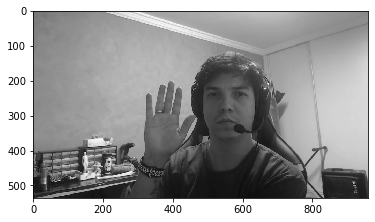

In [125]:
plt.imshow(sourceImage,cmap="gray")

In [126]:
dct = cv.dct(sourceImage.astype(float))

In [131]:
lh = int(round(h - ((compressRatio/100) * h)))
lw = int(round(w - ((compressRatio/100) * w)))

In [132]:
print(lh,lw)

214 384


In [115]:
blocksV = int(h/8)
blocksH = int(w/8)
B = 8
opa = np.zeros((blocksV*8,blocksH*8)) #matriz "holder" de zeros para a guardar a matriz transformada quantizada

#aplicando a quantizacao para cada bloco da imagem
#ONDE OCORRE O DATA LOSS
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = dct[row*B:(row+1)*B,col*B:(col+1)*B]
                currentblock[lh:8, lw:8] = 0
                opa[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock

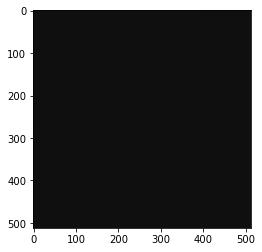

In [116]:
plt.imshow(opa,cmap="gray")

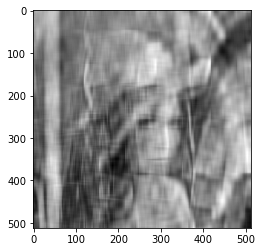

In [119]:
plt.imshow(cv.idct(opa),cmap="gray")

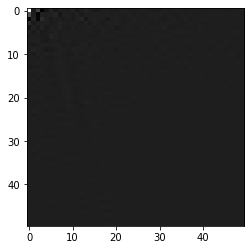

In [133]:
plt.imshow(dct[0:50,0:50],cmap="gray")

In [149]:
compressRatio = 99

In [150]:
lh = int(round(h - ((compressRatio/100) * h)))
lw = int(round(w - ((compressRatio/100) * w)))

In [151]:
print(lh, lw)

5 10


In [152]:
dct[lh:h, lw:w] = 0

In [153]:
idct = cv.idct(dct)

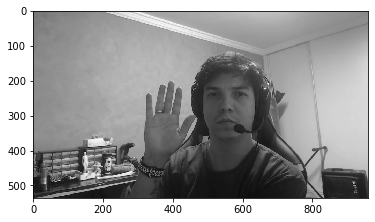

In [154]:
plt.imshow(sourceImage,cmap="gray")

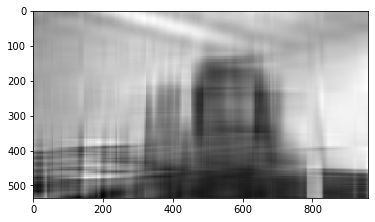

In [155]:
plt.imshow(idct,cmap="gray")